## Obtaining the Efficient Frontier 

The Markowitz Efficient Frontier shows the set of portfolios that maximize expected return for a given level of risk (variance/volatility), or equivalently minimize risk for a given expected return, using asset means, variances, and covariances.

For two companies (Stocks)
***

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline                      

assets = ['WMT', 'FB']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = yf.Ticker(a).history(start='2014-1-1')['Close']

In [2]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)               #Normalizes (scales) the random weights so they add up to exactly 1 (100%)
weights

array([0.47680059, 0.52319941])

In [3]:
weights[0] + weights[1]

np.float64(1.0)

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [4]:
np.sum(weights * log_returns.mean()) * 250

np.float64(0.1354469895248253)

Expected Portfolio Variance:

In [5]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

np.float64(0.01069996624699105)

Expected Portfolio Volatility (Standard Deviation):

In [6]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

np.float64(0.10344064117643051)

***

# Markowitz Efficient frontier calculation
1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [7]:
pf_returns = []
pf_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [8]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([np.float64(0.13741683592198828),
  np.float64(0.13940082858249275),
  np.float64(0.129533734382037),
  np.float64(0.13575355628382318),
  np.float64(0.1302852006283249),
  np.float64(0.12955630511500602),
  np.float64(0.14308501348292818),
  np.float64(0.1294804655294243),
  np.float64(0.13484666640718668),
  np.float64(0.1370093825338052),
  np.float64(0.14263578717204115),
  np.float64(0.1350568556120343),
  np.float64(0.13540958091865152),
  np.float64(0.12903997734737974),
  np.float64(0.13550144704347725),
  np.float64(0.13804589353533256),
  np.float64(0.12922647724156036),
  np.float64(0.14210656891450496),
  np.float64(0.13484558735029506),
  np.float64(0.13331741732225055),
  np.float64(0.138188659255008),
  np.float64(0.14195340468255654),
  np.float64(0.1352357849579934),
  np.float64(0.1367687237499475),
  np.float64(0.13876472723842068),
  np.float64(0.130433295054369),
  np.float64(0.1294746694762283),
  np.float64(0.14170251657925273),
  np.float64(0.13493689304101958)

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once we have done that, the two objects will be NumPy arrays. 

In [9]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([0.13741684, 0.13940083, 0.12953373, 0.13575356, 0.1302852 ,
        0.12955631, 0.14308501, 0.12948047, 0.13484667, 0.13700938,
        0.14263579, 0.13505686, 0.13540958, 0.12903998, 0.13550145,
        0.13804589, 0.12922648, 0.14210657, 0.13484559, 0.13331742,
        0.13818866, 0.1419534 , 0.13523578, 0.13676872, 0.13876473,
        0.1304333 , 0.12947467, 0.14170252, 0.13493689, 0.14225607,
        0.13131931, 0.14328517, 0.13653354, 0.13382921, 0.13443165,
        0.13022655, 0.13003173, 0.13535302, 0.13497935, 0.13133181,
        0.14245693, 0.13911771, 0.13302502, 0.1304336 , 0.1354955 ,
        0.1344511 , 0.14182611, 0.13922085, 0.13513981, 0.13141137,
        0.13235329, 0.13995217, 0.13940582, 0.13749269, 0.13995161,
        0.14052865, 0.13608018, 0.13242219, 0.13309125, 0.14010637,
        0.13858992, 0.12959696, 0.13161373, 0.14126761, 0.14067815,
        0.13151294, 0.13668851, 0.13743201, 0.13875386, 0.13937525,
        0.13353401, 0.13665503, 0.13420901, 0.13

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [10]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})

In [11]:
portfolios.head()

,Return,Volatility
0,0.137417,0.128122
1,0.139401,0.153755
2,0.129534,0.047660
3,0.135754,0.107210
4,0.130285,0.051149


Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize the chart well and make sure we have labeled both the x- and the y- axes.

Text(0, 0.5, 'Expected Return')

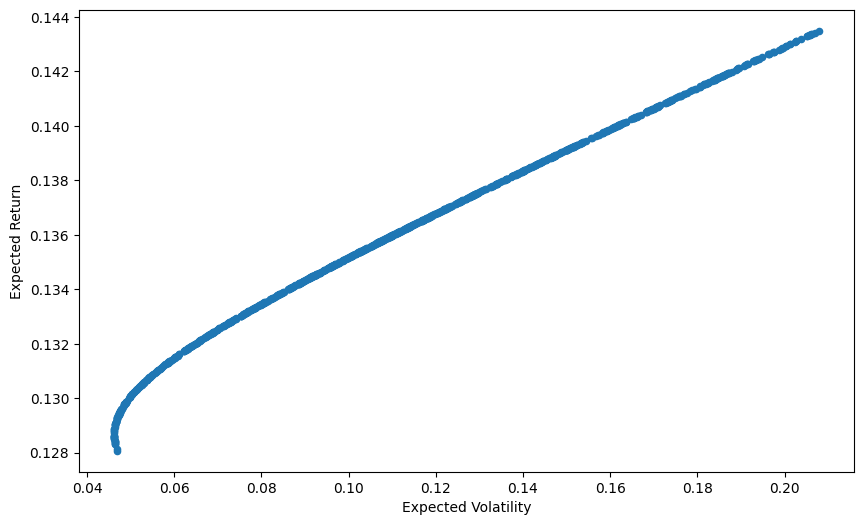

In [12]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

******

For 3 companies or n-nukmber of companies (Stocks)

What would happen if we re-created the Markowitz Efficient Frontier for 3 stocks? 
***

In [13]:
assets = ['WMT', 'META', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = yf.Ticker(a).history(start='2014-1-1')['Close']

In [14]:
pf_data.head()

,WMT,META,BP
Date,,,
2014-01-02 00:00:00-05:00,20.808563,54.330479,23.890913
2014-01-03 00:00:00-05:00,20.740005,54.181526,23.836145
2014-01-06 00:00:00-05:00,20.623978,56.803211,23.900879
2014-01-07 00:00:00-05:00,20.687263,57.518215,24.174734
2014-01-08 00:00:00-05:00,20.523767,57.826069,24.264366


In [15]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [16]:
num_assets = len(assets)
num_assets

3

In [19]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.44103205, 0.41352799, 0.14543996])

In [20]:
weights[0] + weights[1] + weights[2]

np.float64(1.0)

Expected Portfolio Return:

In [21]:
np.sum(weights * log_returns.mean()) * 250

np.float64(0.15145527812901555)

Expected Portfolio Variance:

In [22]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

np.float64(0.044063556303298196)

Expected Portfolio Volatility:

In [23]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

np.float64(0.20991321135959545)

*****

In [24]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09739861, 0.08448625, 0.08607074, 0.15281813, 0.13285659,
        0.1428345 , 0.18648696, 0.17931548, 0.12156578, 0.05338215,
        0.07140686, 0.11691952, 0.13798789, 0.14420864, 0.13680966,
        0.14671382, 0.08504999, 0.16312319, 0.12672122, 0.14304671,
        0.14232105, 0.14990718, 0.13429247, 0.12288453, 0.10161707,
        0.14336958, 0.12727106, 0.09784603, 0.13131595, 0.14170616,
        0.12214014, 0.11561415, 0.15619635, 0.09344507, 0.09287539,
        0.16049578, 0.1435118 , 0.11007819, 0.1256029 , 0.12723927,
        0.10916208, 0.14556048, 0.17440857, 0.11334493, 0.14705925,
        0.16606339, 0.12005536, 0.1474824 , 0.12125433, 0.11511107,
        0.12033492, 0.15897389, 0.1219656 , 0.11820425, 0.16348366,
        0.14341749, 0.12113525, 0.10236252, 0.14381008, 0.16017198,
        0.11786362, 0.12913005, 0.10609513, 0.13754467, 0.08989371,
        0.11781278, 0.13525801, 0.11319325, 0.17007357, 0.17065216,
        0.16752485, 0.11214272, 0.14501007, 0.11

In [25]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

Text(0, 0.5, 'Expected Return')

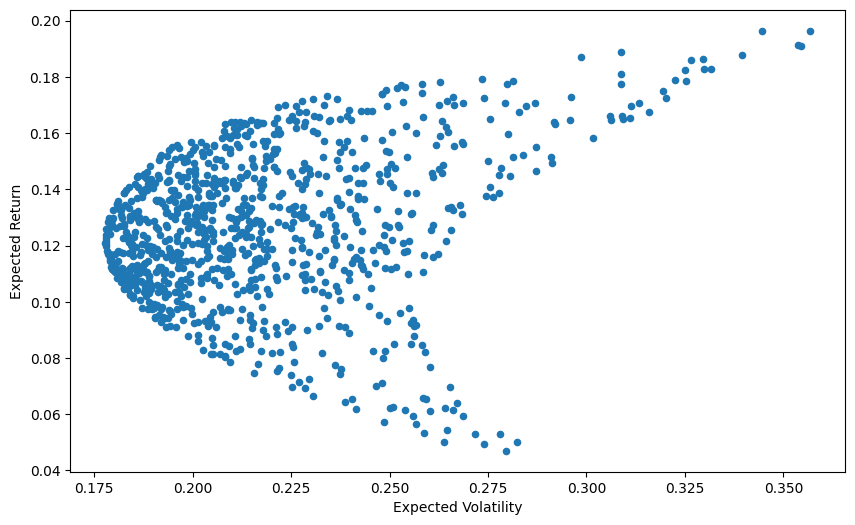

In [26]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')